In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
url = '/content/helpdesk_customer_multi_lang_tickets.csv'  # Replace with your actual file path or URL
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [ ]:
# Check basic info about the dataset
data.info()

# Display descriptive statistics
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1566 non-null   int64  
 1   subject        1565 non-null   object 
 2   body           1565 non-null   object 
 3   answer         1566 non-null   object 
 4   type           1566 non-null   object 
 5   queue          1566 non-null   object 
 6   priority       1566 non-null   object 
 7   language       1566 non-null   object 
 8   business_type  1566 non-null   object 
 9   tag_1          1566 non-null   object 
 10  tag_2          1566 non-null   object 
 11  tag_3          1566 non-null   object 
 12  tag_4          1566 non-null   object 
 13  tag_5          1419 non-null   object 
 14  tag_6          1011 non-null   object 
 15  tag_7          489 non-null    object 
 16  tag_8          137 non-null    object 
 17  tag_9          0 non-null      float64
dtypes: float

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
count,1.566000e+03,1565,1565,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,1419,1011,489,137,0.0
unique,NaN,1565,1565,1566,4,10,3,5,5,25,38,54,63,62,56,42,31,NaN
top,NaN,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,de,IT Services,Technical Support,Product Support,Urgent Issue,Problem Resolution,Problem Resolution,Problem Resolution,Problem Resolution,Service Recovery,NaN
freq,NaN,1,1,1,663,589,788,397,748,756,329,198,391,329,209,64,29,NaN
mean,4.801366e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.627746e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.001352e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.506892e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.351363e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.014945e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


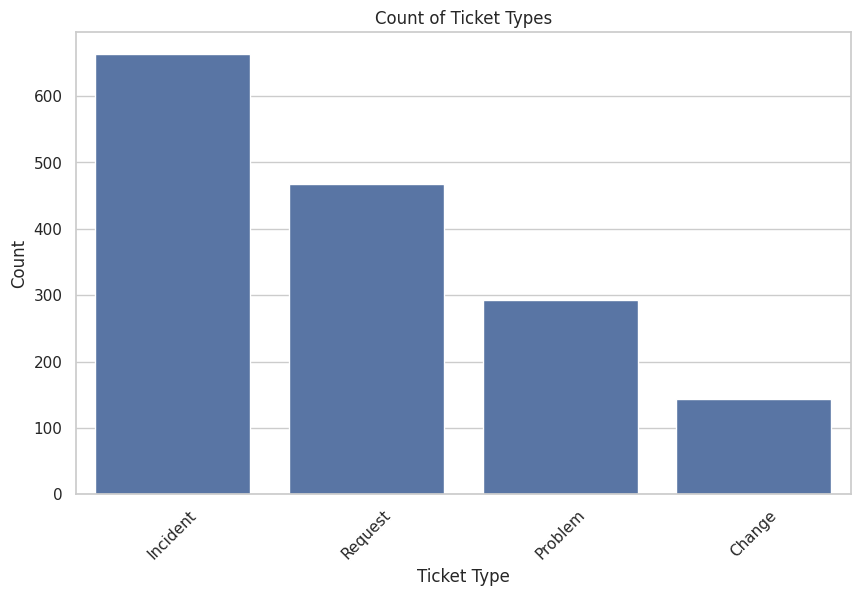

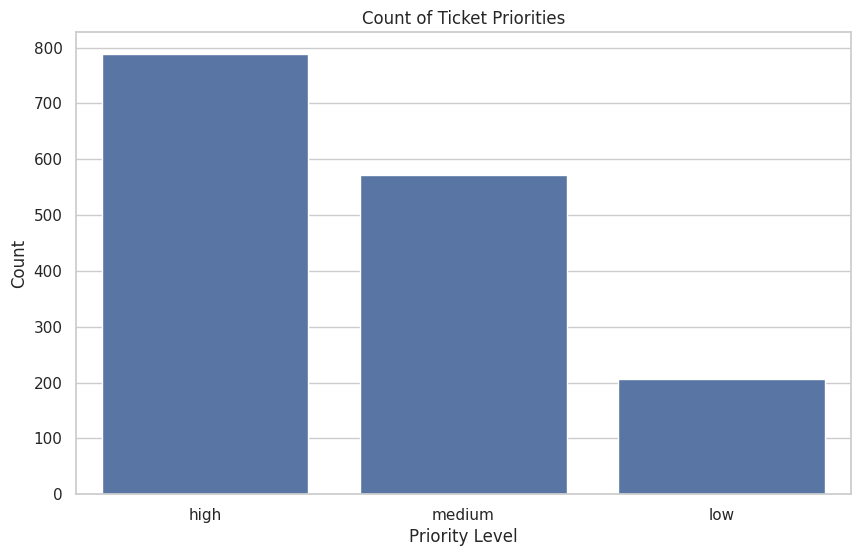

In [ ]:
# Count of ticket types
ticket_type_counts = data['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_type_counts.index, y=ticket_type_counts.values)
plt.title('Count of Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count of ticket priorities
priority_counts = data['priority'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=priority_counts.index, y=priority_counts.values)
plt.title('Count of Ticket Priorities')
plt.xlabel('Priority Level')
plt.ylabel('Count')
plt.show()


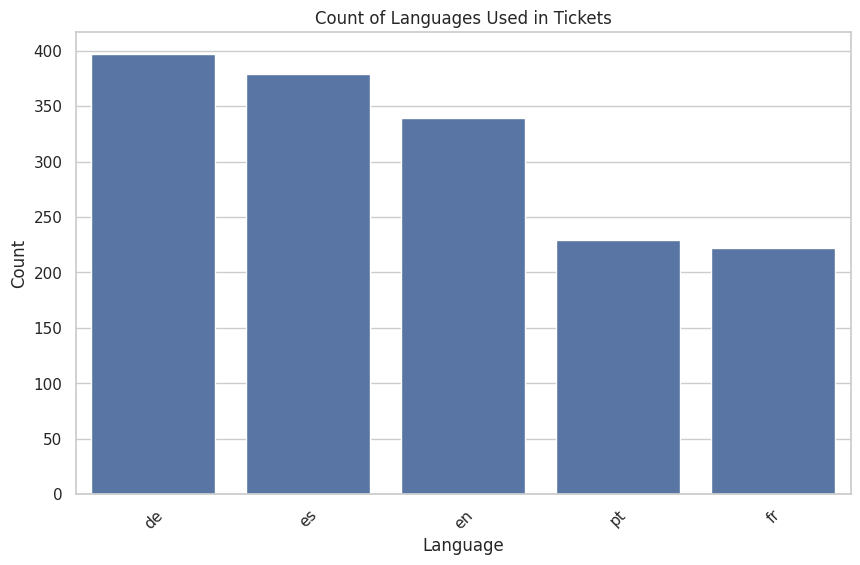

In [ ]:
# Count of languages used in tickets
language_counts = data['language'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Count of Languages Used in Tickets')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by type and priority to find recurring issues
recurring_issues = data.groupby(['type', 'priority']).size().reset_index(name='count')
recurring_issues = recurring_issues.sort_values(by='count', ascending=False)

# Display top recurring issues
print(recurring_issues.head(10))


        type priority  count
3   Incident     high    378
5   Incident   medium    228
11   Request   medium    195
9    Request     high    181
6    Problem     high    158
8    Problem   medium    101
10   Request      low     92
0     Change     high     71
4   Incident      low     57
2     Change   medium     48


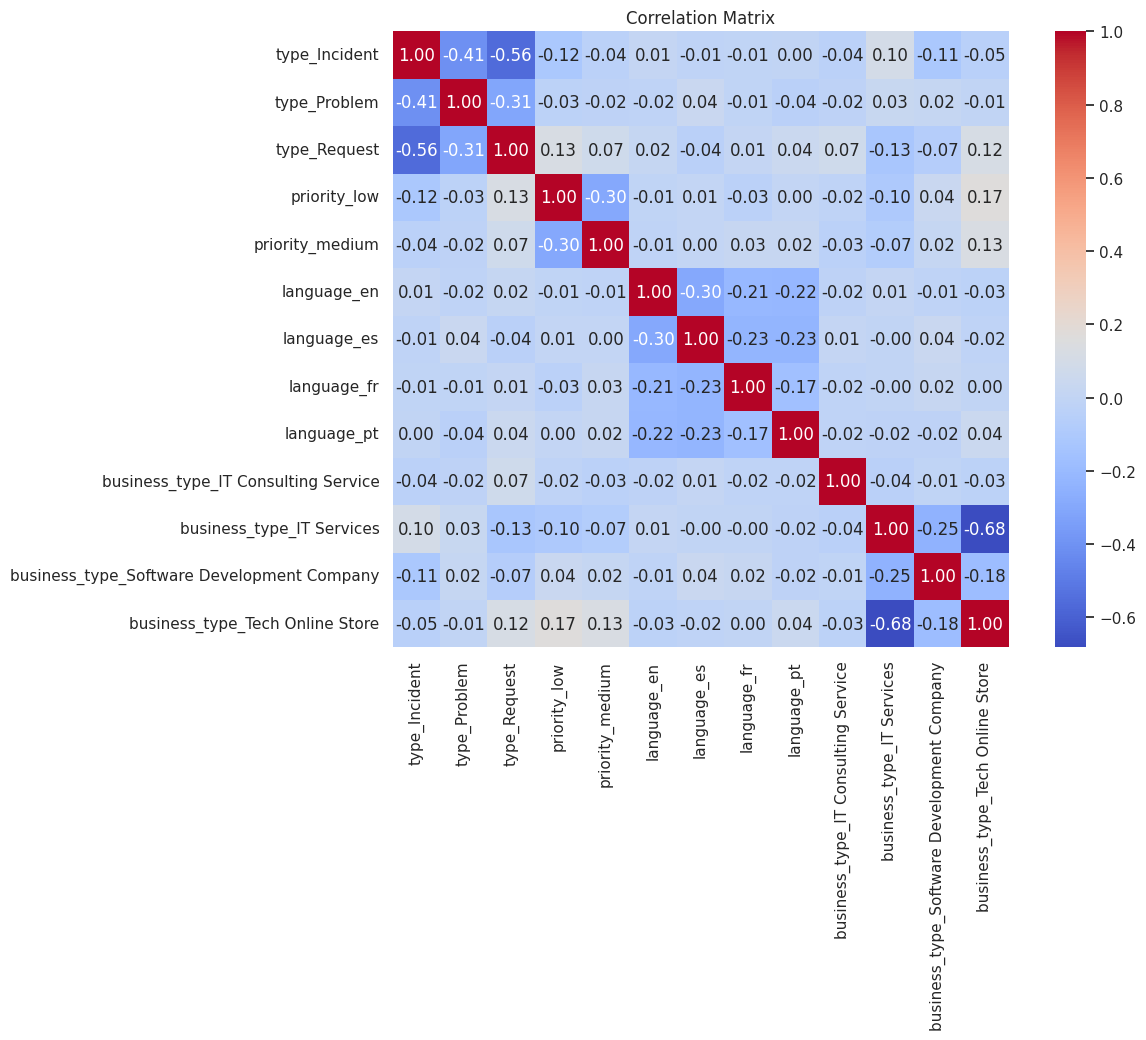

In [ ]:
# Convert categorical variables to numerical for correlation analysis if needed (using one-hot encoding)
data_encoded = pd.get_dummies(data[['type', 'priority', 'language', 'business_type']], drop_first=True)

# Compute correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Grouping by type and priority
grouped_data = data.groupby(['type', 'priority']).size().reset_index(name='count')
print(grouped_data)

# Pivot table for multi-column summary
pivot_table = data.pivot_table(
    values='id',  # Assuming 'id' is unique per row
    index='type',
    columns='priority',
    aggfunc='count',
    fill_value=0
)
print(pivot_table)

        type priority  count
0     Change     high     71
1     Change      low     24
2     Change   medium     48
3   Incident     high    378
4   Incident      low     57
5   Incident   medium    228
6    Problem     high    158
7    Problem      low     33
8    Problem   medium    101
9    Request     high    181
10   Request      low     92
11   Request   medium    195
priority  high  low  medium
type                       
Change      71   24      48
Incident   378   57     228
Problem    158   33     101
Request    181   92     195


<Figure size 1000x600 with 0 Axes>

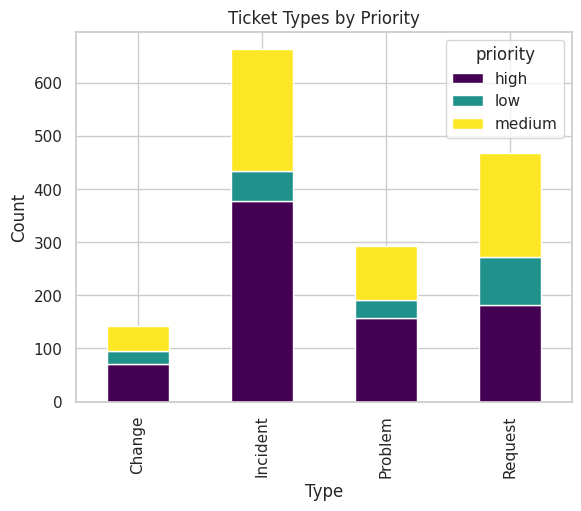

In [ ]:
# Stacked bar plot for type and priority
plt.figure(figsize=(10, 6))
priority_type_counts = data.groupby(['type', 'priority']).size().unstack()
priority_type_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Ticket Types by Priority')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()
